In [1]:
%run imports.py

### Networks

#### Ring Network

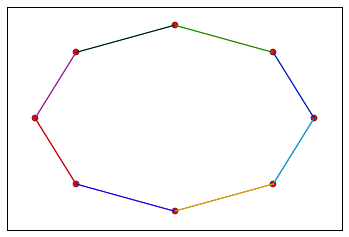

In [2]:
x = Bidirectional_Ring(8)
x.draw()

In [3]:
x.state()

[('P0', {'n': 8}),
 ('P2', {'n': 8}),
 ('P5', {'n': 8}),
 ('P6', {'n': 8}),
 ('P1', {'n': 8}),
 ('P3', {'n': 8}),
 ('P7', {'n': 8}),
 ('P4', {'n': 8})]

#### Line Network

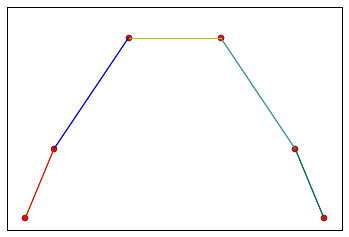

In [4]:
Bidirectional_Line(6).draw()

#### Random Line Network

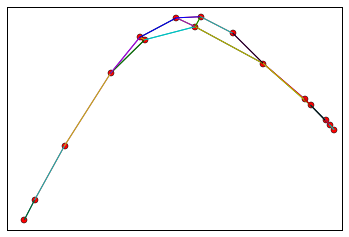

In [5]:
Random_Line_Network(16).draw()

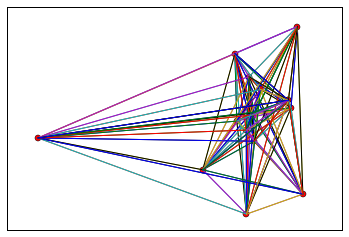

In [6]:
Random_Line_Network(16, sparsity=0).draw()

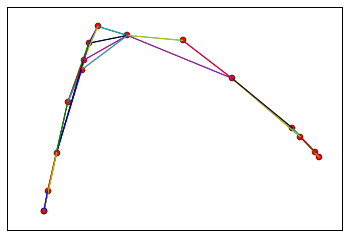

In [7]:
Random_Line_Network(16, sparsity=0.5).draw()

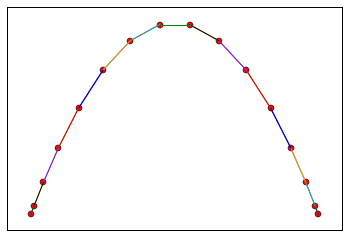

In [8]:
Random_Line_Network(16, sparsity=float('inf')).draw()

### Algorithms

#### A Basic Algorithm: LCR

In [9]:
x = Unidirectional_Ring(5)

##### Initial Network State

In [10]:
x.state()

[('P4', {'n': 5}),
 ('P0', {'n': 5}),
 ('P2', {'n': 5}),
 ('P3', {'n': 5}),
 ('P1', {'n': 5})]

In [11]:
lcr = LCR(x)

--------------
Running LCR on
[P4 -> {P0}, P0 -> {P2}, P2 -> {P3}, P3 -> {P1}, P1 -> {P4}]
Round 1
P0.status is non-leader
P1.status is non-leader
Round 2
P2.status is non-leader
Round 3
P3.status is non-leader
Round 4
Round 5
P4.status is leader
LCR Terminated
Message Complexity: 10
Time Complexity: 5
------------------


##### Time Complexity

In [12]:
print lcr.r, "rounds"

5 rounds


##### Message Complexity

In [13]:
print lcr.message_count, "messages"

10 messages


##### Final Network State

In [14]:
x.state()

[('P4', {'n': 5, 'status': 'leader'}),
 ('P0', {'n': 5, 'status': 'non-leader'}),
 ('P2', {'n': 5, 'status': 'non-leader'}),
 ('P3', {'n': 5, 'status': 'non-leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'})]

#### Chaining Algorithms

In [15]:
x = Random_Line_Network(6)

In [16]:
#Elect a Leader
SynchFloodMax(x, params={'verbosity': Algorithm.QUIET})

SynchFloodMax Terminated
Message Complexity: 50
Time Complexity: 6
------------------


<datk.core.algs.SynchFloodMax instance at 0x10dcb26c8>

In [17]:
#Construct a BFS tree rooted at the Leader 
SynchBFS(x)

-------------------
Running SynchBFS on
[P0 -> {P4}, P4 -> {P0, P3}, P3 -> {P4, P2}, P2 -> {P3, P1}, P1 -> {P2, P5}, P5 -> {P1}]
Round 1
P5.parent is None
P1.parent is P5
Round 2
P2.parent is P1
Round 3
P3.parent is P2
Round 4
P4.parent is P3
Round 5
P0.parent is P4
Round 6
SynchBFS Terminated
Message Complexity: 10
Time Complexity: 6
------------------


<datk.core.algs.SynchBFS instance at 0x10e405d88>

------------------------------
Running SynchConvergeHeight on


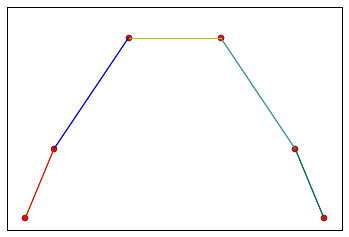

[P0 -> {P4}, P4 -> {P0, P3}, P3 -> {P4, P2}, P2 -> {P3, P1}, P1 -> {P2, P5}, P5 -> {P1}]
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
P5.height is 5
SynchConvergeHeight Terminated
Message Complexity: 15
Time Complexity: 6
------------------


<datk.core.algs.SynchConvergeHeight instance at 0x10e415a28>

In [18]:
SynchConvergeHeight(x, params={'draw':True})

In [19]:
x.state()

[('P0', {'n': 6, 'parent': P4 -> {P0, P3}, 'status': 'non-leader'}),
 ('P4', {'n': 6, 'parent': P3 -> {P4, P2}, 'status': 'non-leader'}),
 ('P3', {'n': 6, 'parent': P2 -> {P3, P1}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P1 -> {P2, P5}, 'status': 'non-leader'}),
 ('P1', {'n': 6, 'parent': P5 -> {P1}, 'status': 'non-leader'}),
 ('P5', {'height': 5, 'n': 6, 'parent': None, 'status': 'leader'})]

#### Equivalently, chain them like this:

In [20]:
x = Random_Line_Network(6)
A = Chain(SynchFloodMax(), Chain(SynchBFS(), SynchConvergeHeight()), params={'verbosity':Algorithm.QUIET})
A(x)

SynchFloodMax Terminated
Message Complexity: 70
Time Complexity: 6
------------------
SynchBFS Terminated
Message Complexity: 14
Time Complexity: 4
------------------
SynchConvergeHeight Terminated
Message Complexity: 8
Time Complexity: 4
------------------


In [21]:
x.state()

[('P5', {'height': 3, 'n': 6, 'parent': None, 'status': 'leader'}),
 ('P3', {'n': 6, 'parent': P5 -> {P3}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P3 -> {P5, P2, P1}, 'status': 'non-leader'}),
 ('P1', {'n': 6, 'parent': P3 -> {P5, P2, P1}, 'status': 'non-leader'}),
 ('P4', {'n': 6, 'parent': P1 -> {P3, P2, P4, P0}, 'status': 'non-leader'}),
 ('P0', {'n': 6, 'parent': P1 -> {P3, P2, P4, P0}, 'status': 'non-leader'})]

**A basic algorithm, with improved message complexity: HS**

In [22]:
x = Bidirectional_Ring(8)

In [23]:
# hs = SynchHS(x)

In [24]:
# Message Complexity

In [25]:
# print hs.message_count, "messages"

### Benchmarking Algorithms

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


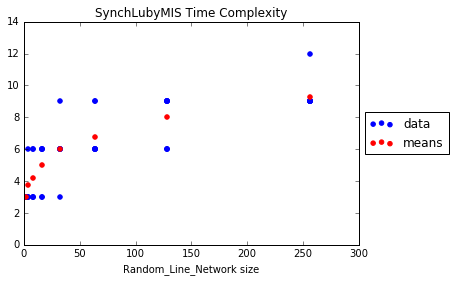

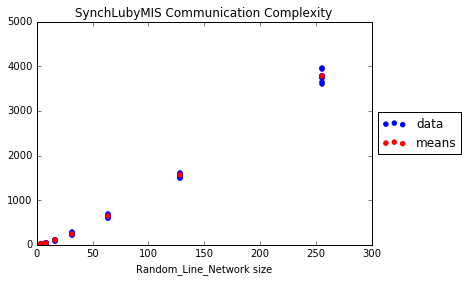

In [26]:
benchmark(SynchLubyMIS, Random_Line_Network, assertLubyMIS)

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


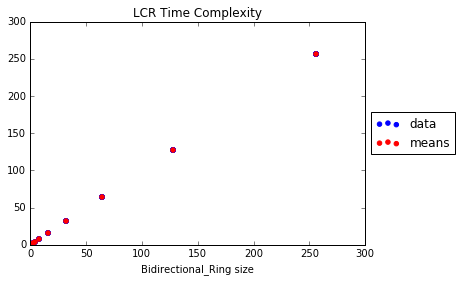

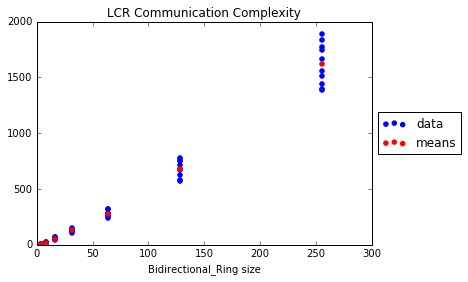

In [27]:
benchmark(LCR, Bidirectional_Ring, assertLeaderElection)

#### Benchmark an Asynchronous Algorithm

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


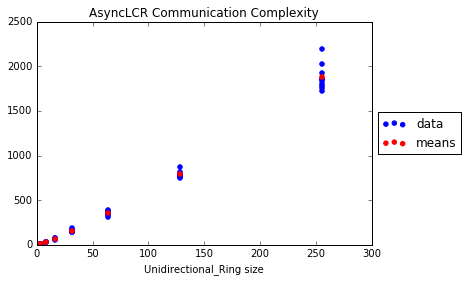

In [28]:
benchmark(AsyncLCR, Unidirectional_Ring, assertLeaderElection)

#### Or pass in a custom function that returns a network in the state your algorithm requires

In [29]:
def Artificial_LE_Network(n):
    x = Random_Line_Network(n)
    for p in x:
        if p.UID == n-1:
            p.state['status'] = 'leader'
    return x

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


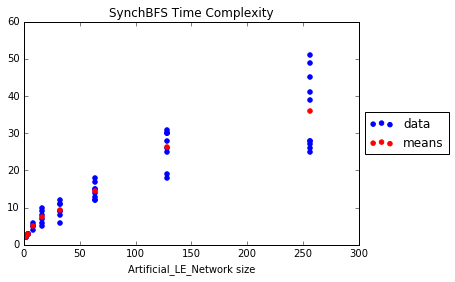

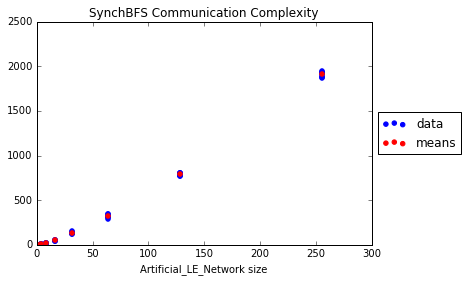

In [30]:
benchmark(SynchBFS, Artificial_LE_Network, assertBFS)